In [41]:
import pandas as pd
import numpy as np
import os
import warnings
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
import time


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [9]:
## Convert Month and Day to Int
month_dic = {str.lower(month): index for index, month in enumerate(calendar.month_abbr) if month}

df['month_No'] = df['month'].apply(lambda x: month_dic[x])

df['day_No'] = df['day'].apply(lambda x: time.strptime(x.capitalize(), '%a').tm_wday)
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_No,day_No
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,3,4
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,10,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,10,5
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,3,4
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,8,6
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,8,6
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,8,6
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,8,5


In [10]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_No,day_No
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,7.475822,3.259188
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,2.275990,2.072929
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,7.000000,1.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,8.000000,4.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,9.000000,5.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,12.000000,6.000000


In [11]:
print("Data Shape:", df.shape)

print("Data Types:", df.dtypes)

Data Shape: (517, 15)
Data Types: X             int64
Y             int64
month        object
day          object
FFMC        float64
DMC         float64
DC          float64
ISI         float64
temp        float64
RH            int64
wind        float64
rain        float64
area        float64
month_No      int64
day_No        int64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         517 non-null    int64  
 1   Y         517 non-null    int64  
 2   FFMC      517 non-null    float64
 3   DMC       517 non-null    float64
 4   DC        517 non-null    float64
 5   ISI       517 non-null    float64
 6   temp      517 non-null    float64
 7   RH        517 non-null    int64  
 8   wind      517 non-null    float64
 9   rain      517 non-null    float64
 10  area      517 non-null    float64
 11  month_No  517 non-null    int64  
 12  day_No    517 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 52.6 KB
None


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'month_No'}>],
       [<Axes: title={'center': 'day_No'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

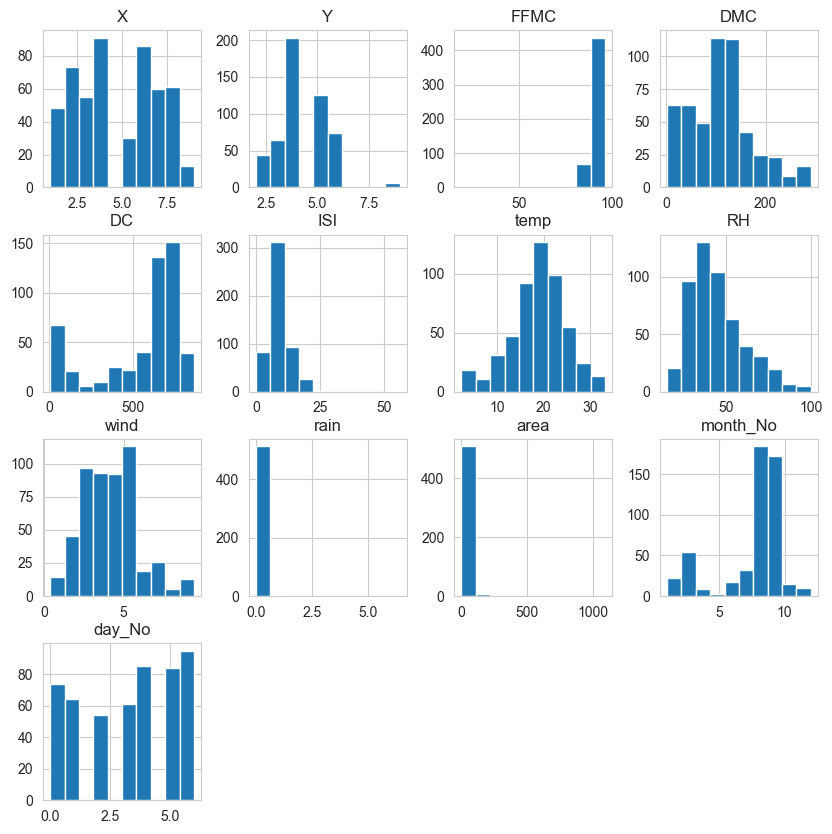

In [12]:
df.drop(columns=['day', 'month'], inplace=True)
print(df.info())

df.hist(figsize=(10, 10))
# Assumptions: 
# 1- Year column Can be dropped
# 2- Correlation Between features and Class Should be Checked

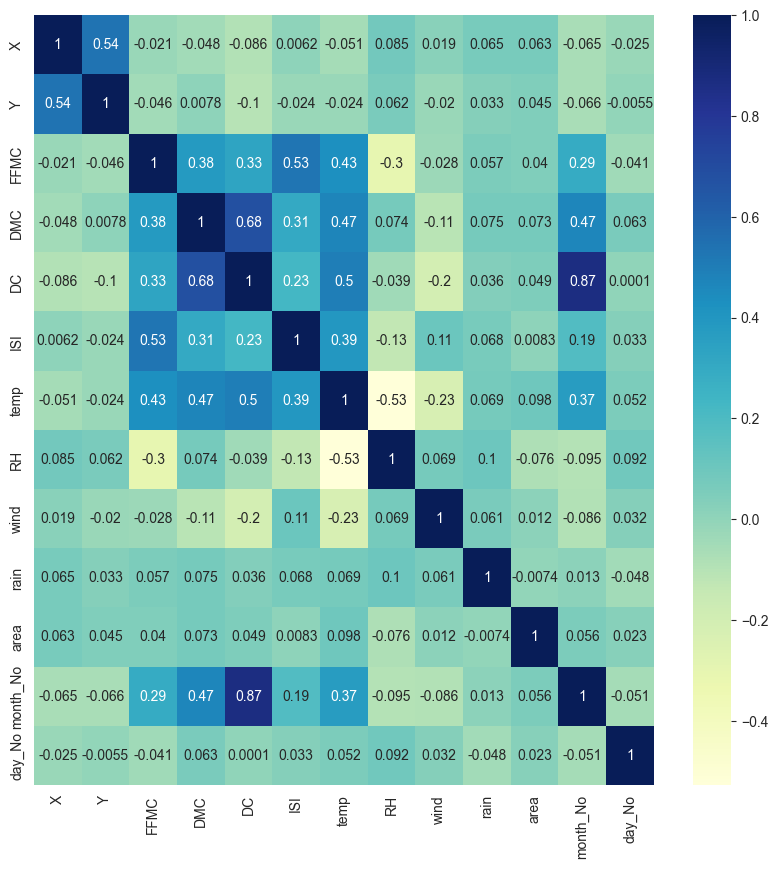

In [13]:

plt.figure(figsize=(10,10))
fig = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X, Y = df.drop(columns='area'), df['area']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

clf = LinearRegression()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

mean_squared_error(y_true=y_test, y_pred=y_pred)

11882.74580625768

In [21]:
## Feature Seletion
model = ExtraTreesRegressor()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X,Y)

print("Number Initial Features:", X.shape[1])
print("Number of features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)


Number Initial Features: 12
Number of features: 5
Selected Features: [False False False  True  True False  True  True  True False False False]
Feature Ranking: [2 5 6 1 1 4 1 1 1 8 7 3]


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

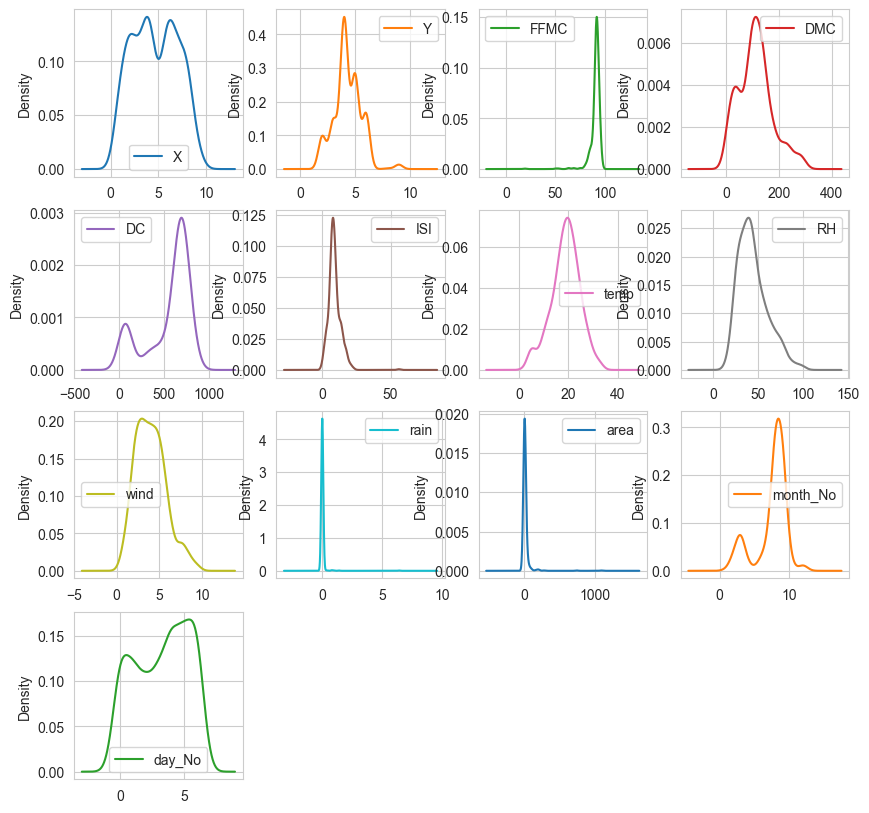

In [24]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(10,10))

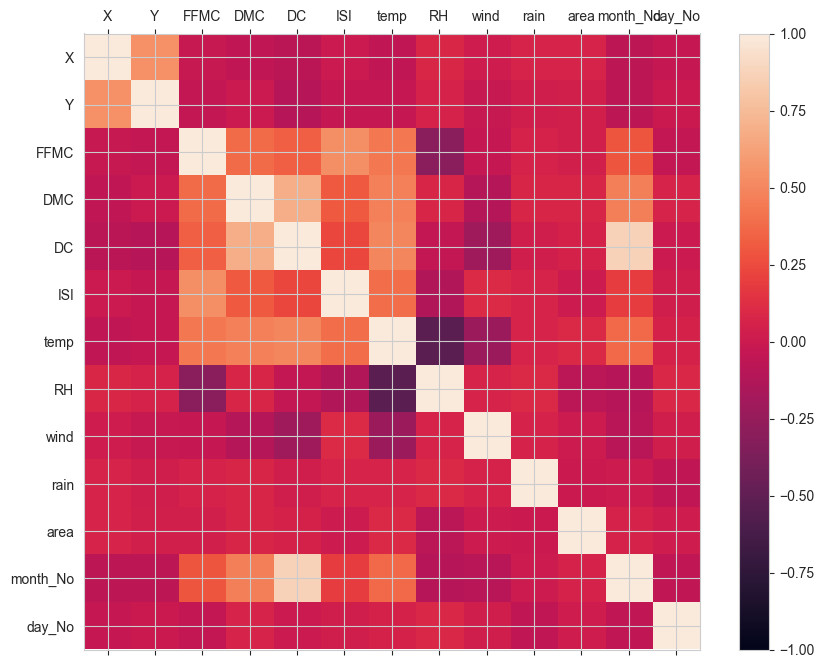

In [39]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [65]:
models = []

models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTrees', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

results = []
names = []
scoring =[]

# Cross Validation
for name, model in models:
    scores = cross_val_score(model, X, Y, cv=5)
    scoring.append(scores.mean())

scoring

[np.float64(-1.87613544315071),
 np.float64(-1.8736634037122326),
 np.float64(-1.6733172055072978),
 np.float64(-1.6804468707539162),
 np.float64(-4.249279598004248),
 np.float64(-3.3633869495302497),
 np.float64(-8.751546119889408),
 np.float64(-11.256742042046046),
 np.float64(-6.587308873477705),
 np.float64(-0.17387229869498352)]